In [4]:
#!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import numpy as np
np.random.seed(42)

import pandas as pd
pd.set_option('display.max_columns', None)

import ast

In [7]:
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
    client_id='36703fb008c44153b325eb8ed25cf24d',
    client_secret='ecbdf1b8a5684456a2fcf0baa96f53dc'))
sp.category('hiphop', country='US')

{'href': 'https://api.spotify.com/v1/browse/categories/hiphop',
 'icons': [{'height': 274,
   'url': 'https://t.scdn.co/media/original/hip-274_0a661854d61e29eace5fe63f73495e68_274x274.jpg',
   'width': 274}],
 'id': 'hiphop',
 'name': 'Hip-Hop'}

In [8]:
# sp.recommendation_genre_seeds()

In [9]:
def randotrack():
    # all available characters
    chars = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'
    # get random character
    randnum = np.random.randint(0,62)
    randchar = chars[randnum]
    # wildcard at beginning, end, or both?
    wildnum = np.random.randint(0,3)
    if wildnum == 0:
        return '%' + randchar
    if wildnum == 1:
        return randchar + '%'
    if wildnum == 2:
        return '%' + randchar + '%'

In [10]:
# there are a metric ton of available hip-hop tracks in the past 3 years
# more popular tracks come up first, but offset only goes to ~990 w/ limit=10
# therefore, I gotta do a random track id, with a random offset
# I'll run this many times and collect all the track info in a big list
rap = sp.search(q=f"genre:hip-hop year:2020-2021 track:{randotrack()}", market='US')

Notes:
- 'popularity' from 0-100, with higher the better. One [source](https://www.loudlab.org/blog/spotify-popularity-leverage-algorithm/) says 50 is the magic number

In [24]:
rap['tracks']['total']

10000

In [25]:
rap['tracks'].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [26]:
rap['tracks']['items'][0].keys()

dict_keys(['album', 'artists', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [27]:
rap['tracks']['items'][0]['album'].keys()

dict_keys(['album_type', 'artists', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

# let's fill out some dataframes




In [29]:
def get_tracks(tracknum=10000, limit=50):
    sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(
        client_id='CLIENT_ID',
        client_secret='CLIENT_SECRET',
        requests_timeout=50000))
    track_dict = {'id': [], 'popularity': [], 'track': [], 'artists': [], 'album_name': [],
                  'album_type': [], 'release_date': [], 'image': [], 'duration_ms': [], 
                  'preview_url': []}
    repeat_id_count = 0
    while len(track_dict['id']) < tracknum:
        search = sp.search(q=f"genre:hip-hop year:2019-2021 track:{randotrack()}",
                           offset=np.random.randint(1001-limit),
                           limit=limit, market='US')
        for track in search['tracks']['items']:
            if track['id'] in track_dict['id']:
                repeat_id_count += 1
                continue
            for col in track_dict.keys():
                if col == 'track':
                    track_dict['track'].append(track['name'])
                    continue
                if col == 'artists':
                    track_dict['artists'].append(
                        [a['name'] for a in track['artists']])
                    continue
                if col == 'album_name':
                    track_dict['album_name'].append(track['album']['name'])
                    continue
                if col == 'album_type':
                    track_dict['album_type'].append(
                        track['album']['album_type'])
                    continue
                if col == 'release_date':
                    track_dict['release_date'].append(
                        track['album']['release_date'])
                    continue
                if col == 'image':
                    try:
                        track_dict['image'].append(
                            track['album']['images'][0]['url'])
                        continue
                    except:
                        track_dict['image'].append(np.nan)
                        continue
                track_dict[col].append(track[col])
    print('Repeat ID Count:\n', repeat_id_count)
    return pd.DataFrame(track_dict)

In [31]:
! ls

sample_data


In [33]:
for i in range(0,500):
        print(f'Data chunk #{i}...')
        get_tracks(tracknum=100).to_csv(f'sample_data/track_df{i}.csv')

Data chunk #0...
Repeat ID Count:
 0
Data chunk #1...
Repeat ID Count:
 0
Data chunk #2...
Repeat ID Count:
 0
Data chunk #3...
Repeat ID Count:
 0
Data chunk #4...
Repeat ID Count:
 1
Data chunk #5...
Repeat ID Count:
 0
Data chunk #6...
Repeat ID Count:
 0
Data chunk #7...
Repeat ID Count:
 0
Data chunk #8...
Repeat ID Count:
 0
Data chunk #9...
Repeat ID Count:
 0
Data chunk #10...
Repeat ID Count:
 0
Data chunk #11...
Repeat ID Count:
 0
Data chunk #12...
Repeat ID Count:
 0
Data chunk #13...
Repeat ID Count:
 0
Data chunk #14...
Repeat ID Count:
 0
Data chunk #15...
Repeat ID Count:
 0
Data chunk #16...
Repeat ID Count:
 0
Data chunk #17...
Repeat ID Count:
 0
Data chunk #18...
Repeat ID Count:
 0
Data chunk #19...
Repeat ID Count:
 0
Data chunk #20...
Repeat ID Count:
 0
Data chunk #21...
Repeat ID Count:
 0
Data chunk #22...
Repeat ID Count:
 0
Data chunk #23...
Repeat ID Count:
 0
Data chunk #24...
Repeat ID Count:
 0
Data chunk #25...
Repeat ID Count:
 0
Data chunk #26...
Repe

In [34]:
track_df = pd.read_csv('sample_data/track_df0.csv', index_col=0)
for i in range(1,500):
    track_df = pd.concat([track_df, 
                          pd.read_csv(f'sample_data/track_df{i}.csv', index_col=0)])

In [35]:
track_df.head()

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,0zAeWR49IfNhtV0LLKC3wm,9,Ngày Xa Em Là Ngày Mưa Rơi (#NXELNMR),"['Hành OR', 'MC Weed', 'Vĩnh Hoàng']",Tuyển Tập Của Joker Rock,single,2019-07-17,https://i.scdn.co/image/ab67616d0000b2737d9471...,244653,https://p.scdn.co/mp3-preview/7696a47b7319b2b5...
1,2NsAuj9pIY8GA19sfCfw6t,9,A. Xis,['Xis'],Seja Como For (Remasterizado),album,2020-05-20,https://i.scdn.co/image/ab67616d0000b273544965...,278760,https://p.scdn.co/mp3-preview/745ad0151e14508d...
2,7bRGtnDrBadDfoicmoPQNd,3,In God We Trust: Green Xan,['Shad Da God'],In God We Trust: Green Xan,single,2020-03-24,https://i.scdn.co/image/ab67616d0000b2736501d4...,189360,https://p.scdn.co/mp3-preview/6fa7111dc51c920e...
3,4MueodEZ8XMfmn87z8955c,29,Lemonade - Ay Em x Young Smokes,"['Ay Em', 'Young Smokes']",Lemonade (Ay Em x Young Smokes),single,2020-01-23,https://i.scdn.co/image/ab67616d0000b273bc8d52...,187173,https://p.scdn.co/mp3-preview/2ba459e80ad78d31...
4,0ESceqfR9LshEn1QNNzDmq,38,XXX,"['Mista Meta', 'SKALPELL FINGAZ']",XXX,single,2021-10-29,https://i.scdn.co/image/ab67616d0000b2739a6ead...,118660,https://p.scdn.co/mp3-preview/85faaa5858dd32cd...


In [36]:
# Drop duplicates across full dataframe
track_df = track_df.drop_duplicates()

In [37]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16707 entries, 0 to 49
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            16707 non-null  object
 1   popularity    16707 non-null  int64 
 2   track         16707 non-null  object
 3   artists       16707 non-null  object
 4   album_name    16707 non-null  object
 5   album_type    16707 non-null  object
 6   release_date  16707 non-null  object
 7   image         16706 non-null  object
 8   duration_ms   16707 non-null  int64 
 9   preview_url   13576 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [38]:
track_df.isna().sum()

id                 0
popularity         0
track              0
artists            0
album_name         0
album_type         0
release_date       0
image              1
duration_ms        0
preview_url     3131
dtype: int64

In [39]:
track_df.sort_index()

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,0zAeWR49IfNhtV0LLKC3wm,9,Ngày Xa Em Là Ngày Mưa Rơi (#NXELNMR),"['Hành OR', 'MC Weed', 'Vĩnh Hoàng']",Tuyển Tập Của Joker Rock,single,2019-07-17,https://i.scdn.co/image/ab67616d0000b2737d9471...,244653,https://p.scdn.co/mp3-preview/7696a47b7319b2b5...
0,29IqIzdksHjXYnserMnNmh,53,Uber X,['Jordy'],Uber X,single,2019-09-12,https://i.scdn.co/image/ab67616d0000b273128164...,182256,https://p.scdn.co/mp3-preview/e70a8ce60443b845...
0,3ujuCLxBQcopRYuLiA5TO9,0,25/8,"['Maxie', 'G Fresh', 'Brew Nastty']",Rubberband Lingo 2,album,2021-01-09,https://i.scdn.co/image/ab67616d0000b273613309...,248780,https://p.scdn.co/mp3-preview/a8135e2805aff673...
0,09w5MYi1kJnzwpDzCKQIsg,40,Niggas Is Niggas,['Comethazine'],Comethazine The Album,album,2021-10-22,https://i.scdn.co/image/ab67616d0000b273bc174f...,90491,https://p.scdn.co/mp3-preview/7de29a0242fd0d09...
0,3M5kFm7s2mtoU4WblAuJrY,34,Un Viaje de Colores,['Jauria Santa'],"En Ciudades, Vol. 2",album,2020-10-02,https://i.scdn.co/image/ab67616d0000b273e67dc4...,191111,https://p.scdn.co/mp3-preview/bfe95ba924611856...
...,...,...,...,...,...,...,...,...,...,...
147,2LRYaXXxkMrvSFyaSZHMPs,57,Take It To Trial (feat. Yak Gotti),"['Young Stoner Life', 'Young Thug', 'Gunna', '...",Slime Language 2,album,2021-04-16,https://i.scdn.co/image/ab67616d0000b2732cf2c6...,170266,https://p.scdn.co/mp3-preview/cbf0746af74f15e8...
147,4FbEljjTdoUcnY2aYsxDDh,47,25WAGG3DOU2,['Lancey Foux'],LIVE.EVIL,album,2021-11-19,https://i.scdn.co/image/ab67616d0000b273749912...,143413,NaN
148,07Y65et1sMhIcVP4MA7p0R,58,Tengo To,"['Nicki Nicole', 'Ptazeta', 'Snow Tha Product']",Parte de Mí,album,2021-10-28,https://i.scdn.co/image/ab67616d0000b27319f705...,182470,https://p.scdn.co/mp3-preview/b0f37860c5f1cbff...
148,2PKRz9DR6lUX6zAJgW5aRV,48,Before You Wake Up,['Adekunle Gold'],Before You Wake Up,single,2019-03-01,https://i.scdn.co/image/ab67616d0000b273076c17...,174500,https://p.scdn.co/mp3-preview/139553223191f6ed...


In [40]:
track_df.reset_index(inplace=True)

In [41]:
track_df.drop(columns='index', inplace=True)

In [42]:
track_df['artists'] = track_df['artists'].map(lambda x: ast.literal_eval(x))

In [43]:
track_df_expart = track_df.explode('artists')
track_df_expart

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
0,0zAeWR49IfNhtV0LLKC3wm,9,Ngày Xa Em Là Ngày Mưa Rơi (#NXELNMR),Hành OR,Tuyển Tập Của Joker Rock,single,2019-07-17,https://i.scdn.co/image/ab67616d0000b2737d9471...,244653,https://p.scdn.co/mp3-preview/7696a47b7319b2b5...
0,0zAeWR49IfNhtV0LLKC3wm,9,Ngày Xa Em Là Ngày Mưa Rơi (#NXELNMR),MC Weed,Tuyển Tập Của Joker Rock,single,2019-07-17,https://i.scdn.co/image/ab67616d0000b2737d9471...,244653,https://p.scdn.co/mp3-preview/7696a47b7319b2b5...
0,0zAeWR49IfNhtV0LLKC3wm,9,Ngày Xa Em Là Ngày Mưa Rơi (#NXELNMR),Vĩnh Hoàng,Tuyển Tập Của Joker Rock,single,2019-07-17,https://i.scdn.co/image/ab67616d0000b2737d9471...,244653,https://p.scdn.co/mp3-preview/7696a47b7319b2b5...
1,2NsAuj9pIY8GA19sfCfw6t,9,A. Xis,Xis,Seja Como For (Remasterizado),album,2020-05-20,https://i.scdn.co/image/ab67616d0000b273544965...,278760,https://p.scdn.co/mp3-preview/745ad0151e14508d...
2,7bRGtnDrBadDfoicmoPQNd,3,In God We Trust: Green Xan,Shad Da God,In God We Trust: Green Xan,single,2020-03-24,https://i.scdn.co/image/ab67616d0000b2736501d4...,189360,https://p.scdn.co/mp3-preview/6fa7111dc51c920e...
...,...,...,...,...,...,...,...,...,...,...
16706,7zEANYSbDq9RLMsIoJRZm8,32,"Espejo (feat. Jaycob Duque, Magic Q)",Ochentay7,Trap House Vol. 2,album,2020-10-20,https://i.scdn.co/image/ab67616d0000b273e66e08...,193402,https://p.scdn.co/mp3-preview/2d63a955f3f81b86...
16706,7zEANYSbDq9RLMsIoJRZm8,32,"Espejo (feat. Jaycob Duque, Magic Q)",Robot95,Trap House Vol. 2,album,2020-10-20,https://i.scdn.co/image/ab67616d0000b273e66e08...,193402,https://p.scdn.co/mp3-preview/2d63a955f3f81b86...
16706,7zEANYSbDq9RLMsIoJRZm8,32,"Espejo (feat. Jaycob Duque, Magic Q)",Neto Peña,Trap House Vol. 2,album,2020-10-20,https://i.scdn.co/image/ab67616d0000b273e66e08...,193402,https://p.scdn.co/mp3-preview/2d63a955f3f81b86...
16706,7zEANYSbDq9RLMsIoJRZm8,32,"Espejo (feat. Jaycob Duque, Magic Q)",Jaycob Duque,Trap House Vol. 2,album,2020-10-20,https://i.scdn.co/image/ab67616d0000b273e66e08...,193402,https://p.scdn.co/mp3-preview/2d63a955f3f81b86...


In [44]:
# checking out artists for completeness of data
# really not complete at all but good enough for now. Will investigate more later
track_df_expart[track_df_expart['artists'] == 'Drake']

,id,popularity,track,artists,album_name,album_type,release_date,image,duration_ms,preview_url
127,6C9SwoZ5OrxcvkntgA5t8s,58,4pm in Calabasas,Drake,Care Package,album,2019-08-02,https://i.scdn.co/image/ab67616d0000b2739c1e02...,240217,NaN
152,6ZoZ4KGIDD23DohdVk0Ybw,55,Wants and Needs (feat. Lil Baby),Drake,Scary Hours 2,single,2021-03-05,https://i.scdn.co/image/ab67616d0000b273aeb93e...,194089,NaN
679,2Q3jFbyE61mCjS3SkW4toJ,70,Race My Mind,Drake,Certified Lover Boy,album,2021-09-03,https://i.scdn.co/image/ab67616d0000b273cd945b...,269883,NaN
950,4alHkxxwAhvoGg3dJCATKV,50,My Side,Drake,Care Package,album,2019-08-02,https://i.scdn.co/image/ab67616d0000b2739c1e02...,294650,NaN
963,2SAqBLGA283SUiwJ3xOUVI,82,Laugh Now Cry Later (feat. Lil Durk),Drake,Laugh Now Cry Later (feat. Lil Durk),single,2020-08-14,https://i.scdn.co/image/ab67616d0000b27352c75e...,261492,NaN
...,...,...,...,...,...,...,...,...,...,...
15204,6fMjgKinTRJ6CjuZKMSEiA,37,B.B. King Freestyle (with Drake),Drake,B.B. King Freestyle,single,2020-11-30,https://i.scdn.co/image/ab67616d0000b2739ecf7f...,222801,NaN
15502,65OVbaJR5O1RmwOQx0875b,83,Wants and Needs (feat. Lil Baby),Drake,Scary Hours 2,single,2021-03-05,https://i.scdn.co/image/ab67616d0000b2738b20e4...,192956,NaN
15506,3kCwyvhvVTyehIzYN2I0nF,58,Omertà,Drake,The Best In The World Pack,single,2019-06-15,https://i.scdn.co/image/ab67616d0000b2733f3b65...,219506,NaN
15741,6jy9yJfgCsMHdu2Oz4BGKX,72,Papi’s Home,Drake,Certified Lover Boy,album,2021-09-03,https://i.scdn.co/image/ab67616d0000b273cd945b...,178623,NaN


In [45]:
# a lot of artists who I'd consider popular are below 70 on average
track_df_expart[track_df_expart['popularity'] >= 40].groupby('artists').mean()\
.sort_values('popularity', ascending=False)

,popularity,duration_ms
artists,,
Julieta Venegas,91.0,207301.0
Neo Beats,86.0,141769.0
Christian Nodal,83.0,197333.0
Empire of the Sun,79.0,234333.0
Phonk,78.0,150941.0
...,...,...
TK Kravitz,40.0,147986.0
Yungster Jack,40.0,107941.0
A.C.O,40.0,262250.0


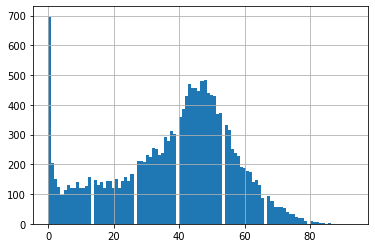

In [46]:
'''
40 or higher seems to be a decent cutoff
will select the cutoff after the train-test-holdout split though to
keep data leakage at a minimum
'''
track_df['popularity'].hist(bins=100)

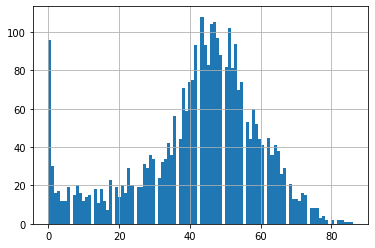

In [47]:
# songs without mp3s skew slightly more popular
track_df[track_df['preview_url'].isna()]['popularity'].hist(bins=100)

In [48]:
# Drop duplicate preview mp3s
mp3s = track_df.drop_duplicates(subset=['preview_url'])
mp3s = mp3s.dropna(subset=['preview_url'])

In [49]:
mp3s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12938 entries, 0 to 16706
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            12938 non-null  object
 1   popularity    12938 non-null  int64 
 2   track         12938 non-null  object
 3   artists       12938 non-null  object
 4   album_name    12938 non-null  object
 5   album_type    12938 non-null  object
 6   release_date  12938 non-null  object
 7   image         12937 non-null  object
 8   duration_ms   12938 non-null  int64 
 9   preview_url   12938 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


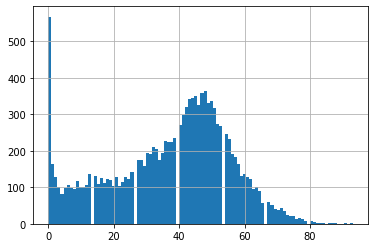

In [50]:
mp3s['popularity'].hist(bins=100)

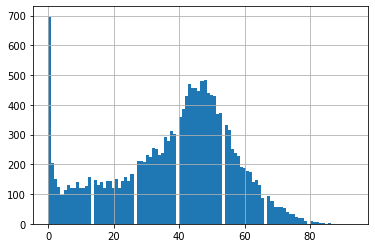

In [51]:
# songs with preview mp3s and all unique songs collected are distributed about the same
# (despite the above thing being true about no mp3 songs)
track_df['popularity'].hist(bins=100)

In [53]:
mp3s.to_csv('sample_data/collection_1_mp3s.csv')

### Stuff with Spotify's audio analysis, will come back to later

In [ ]:
KC = sp.search(q=f"artist:KC Makes Music", market='US')

In [ ]:
KC['tracks']['items'][0]['id']

In [ ]:
sp.audio_features('3W3cS8fgzXc2PcWtywV2gQ')

In [ ]:
sp.audio_analysis('3W3cS8fgzXc2PcWtywV2gQ').keys()

In [ ]:
sp.audio_analysis('3W3cS8fgzXc2PcWtywV2gQ')['track']

In [ ]:
track_df.loc[0,'id']

In [ ]:
sp.audio_features(track_df.loc[0,'id'])[0]

In [ ]:
audio_features_keys

Audio analysis and audio features dataframe
- sample rate = `num_samples`/`duration` = 22050 samples/sec 
- `analysis_channels` = 1, mono sound

In [ ]:
list(sp.audio_features(track_df.loc[0,'id'])[0].keys())

In [ ]:
audio_analysis_keys = ['num_samples','duration',
                       'analysis_sample_rate','end_of_fade_in',
                       'start_of_fade_out','tempo','tempo_confidence','time_signature',
                       'time_signature_confidence','key','key_confidence','mode','mode_confidence']
audio_features_keys = ['loudness','danceability','energy','speechiness',
                       'acousticness','instrumentalness','liveness','valence']
audio_df = pd.DataFrame(columns=['id', *audio_analysis_keys, *audio_features_keys])
audio_df['id'] = track_df['id'].copy()

for track in audio_df['id']:
    analysis = sp.audio_analysis(track)['track']
    features = sp.audio_features(track)[0]
    
    for col in audio_analysis_keys:
        audio_df.loc[audio_df['id'] == track, col] = analysis[col]
    for col in audio_features_keys:
        audio_df.loc[audio_df['id'] == track, col] = features[col]

audio_df

In [ ]:
audio_df.iloc[:,1:].applymap(int).describe()

In [ ]:
list(audio_df.loc[:10,'id'].values)